<a href="https://colab.research.google.com/github/sike990/HandsOn-ML/blob/main/HandsOnML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
!git clone https://github.com/sike990/HandsOn-ML.git

fatal: destination path 'HandsOn-ML' already exists and is not an empty directory.


In [68]:
import pandas as pd
import os
import tarfile
import matplotlib.pyplot as plt
import numpy as np

In [69]:
def load_housing_data():
  # The housing.tgz file is located directly under the "Housing" directory, not under a subfolder called "Housing".
  with tarfile.open("/content/HandsOn-ML/HousingD/housing.tgz") as housing_tar:
    housing_tar.extractall(path="/content/HandsOn-ML/HousingD")
  # Also, the CSV file is named "housing.csv", not ".housing.csv".
  return pd.read_csv("/content/HandsOn-ML/HousingD/housing.csv")

In [70]:
housing = load_housing_data()

In [71]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [72]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [73]:
housing.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [74]:
housing['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [75]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


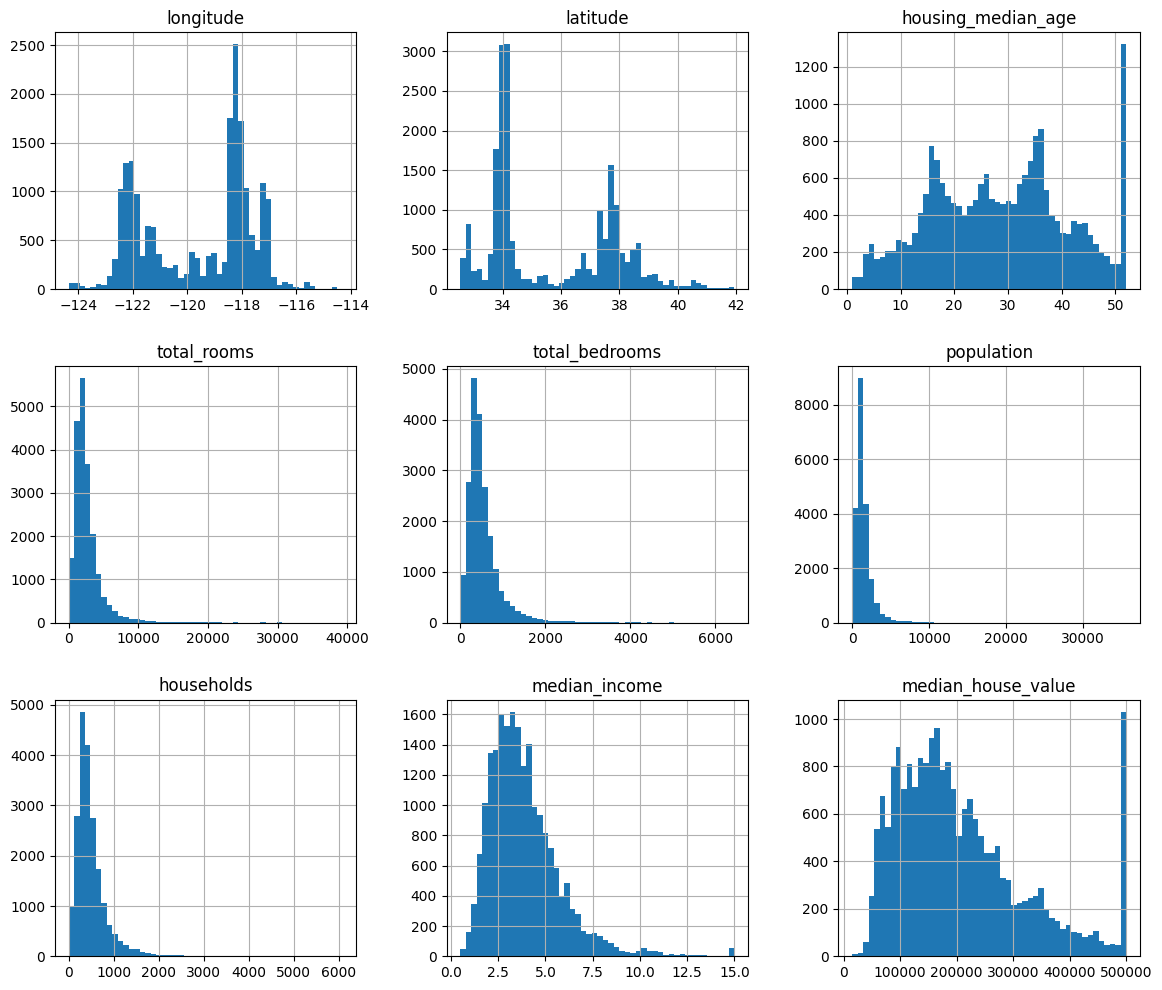

In [76]:
housing.hist(bins = 50 , figsize = (14,12))
plt.show()

In [77]:
# data = housing

In [78]:
# import numpy as np

# def shuffle_and_split_data(data , test_ratio):
#   shuffled_indices = np.random.permutation(len(data))
#   test_set_size = int(len(data)*test_ratio)
#   test_indices = shuffled_indices[:test_set_size]
#   train_indices = shuffled_indices[test_set_size:]
#   return data.iloc[train_indices] , data.iloc[test_indices]



In [79]:
# train , test = shuffle_and_split_data(data , 0.2)

# print("train: " , len(train) , "test : " , len(test))



**The above method works perfect but each time random function generates a diffrent set of indices which you want to avoid  ,sol : use seeding(But it will not work too if the dataset is updated)**

In [80]:
from sklearn.model_selection import train_test_split

train , test = train_test_split(housing , test_size = 0.2 , random_state = 42)
print( " Train : " , len(train) , "Test : " , len(test))

 Train :  16512 Test :  4128


**It's important that your sample represents the whole population thus the sampling should be done in that way(Stratified sampling)**

In [81]:
housing['income_cat'] = pd.cut(housing["median_income"] , bins = [0.,1.5,3.0,4.5,6.,np.inf] , labels = [1,2,3,4,5])

In [82]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


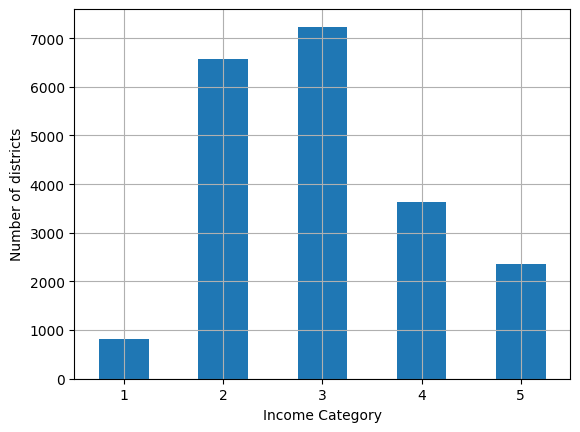

In [83]:
housing["income_cat"].value_counts().sort_index().plot.bar( rot = 0 , grid = True )
plt.xlabel("Income Category")
plt.ylabel("Number of districts")#As each instance represents a district
plt.show()

**Now making 10 different stratified splits(OTB median_cat) from the same dataset**

In [84]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits = 10 , test_size = 0.2 , random_state = 42)
strat_splits = []
count = 0
for trainind , testind in splitter.split(housing , housing['income_cat']):
  strat_train = housing.iloc[trainind] #split method returns indexes
  strat_test = housing.iloc[testind]
  strat_splits.append([strat_train , strat_test])
  print(count)
  count += 1

0
1
2
3
4
5
6
7
8
9


In [85]:
#Function to get a single stratified splits
strat_train_1 , strat_test_1 = train_test_split(housing , test_size = 0.2 , stratify = housing["income_cat"] , random_state = 42)

In [86]:
strat_train , strat_test = strat_splits[1]

In [87]:
#Check if it worked or not
housing["income_cat"].value_counts()/len(housing)

,count
income_cat,
3,0.350581
2,0.318847
4,0.176308
5,0.114438
1,0.039826


In [88]:
strat_train["income_cat"].value_counts()/len(housing)

,count
income_cat,
3,0.280475
2,0.255087
4,0.141037
5,0.091570
1,0.031831


In [89]:
for set_ in (strat_test , strat_train):
  print(count)
  count+=1
  set_.drop("income_cat" , axis = 1 , inplace = True)

10
11


<ipython-input-89-686df2448283>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat" , axis = 1 , inplace = True)
<ipython-input-89-686df2448283>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat" , axis = 1 , inplace = True)


In [90]:
strat_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [91]:
housing = strat_train.copy()

In [92]:
import seaborn as sns

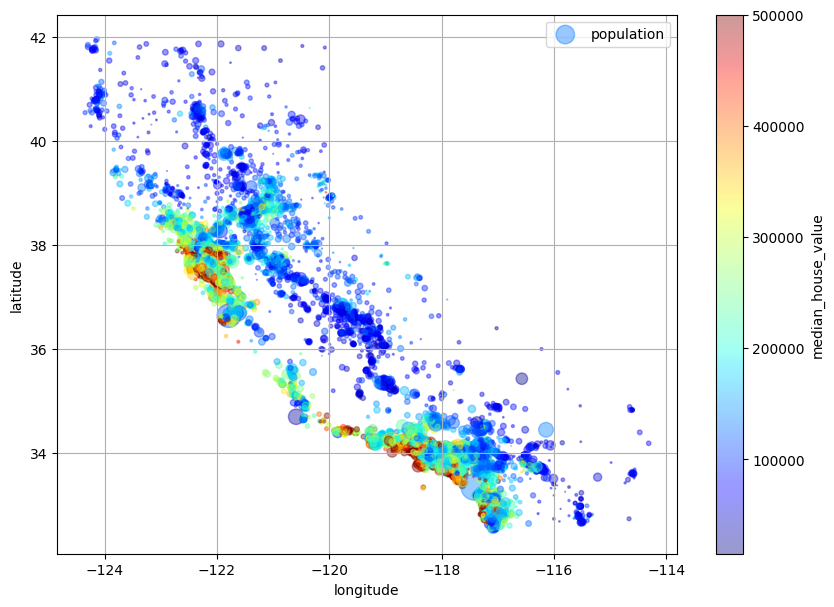

In [102]:
#sns.scatterplot( x= housing["longitude"] , y = housing["latitude"] , alpha = 0.2 , hue = housing["income_cat"] )
housing.plot(kind = "scatter" , x = "longitude" , y = "latitude" , alpha = 0.4 , cmap = "jet" , c = "median_house_value" , s  = housing["population"]/100 , sharex = False , colorbar = True , label = "population" , figsize = (10,7))
plt.grid(True , zorder = 10)
plt.show()